In [ ]:
Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

Upload File

In [5]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [10]:
# First ensure all dependencies are installed
!pip install lxml html5lib

# Then run the web scraping code
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

try:
    # Fetch webpage
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
    
    # Parse with html5lib as fallback
    soup = BeautifulSoup(response.text, "html.parser")  # Uses best available parser
    
    # Find revenue table
    tables = soup.find_all("table")
    revenue_table = None
    
    for table in tables:
        if "Quarterly Revenue" in str(table):
            revenue_table = table
            break
    
    if revenue_table is None:
        raise ValueError("Revenue table not found")
    
    # Process table
    gme_revenue = pd.read_html(StringIO(str(revenue_table)))[0]
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[,\$]', '', regex=True)
    gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
    gme_revenue = gme_revenue.dropna()
    
    print("Last 5 rows of GameStop Quarterly Revenue:")
    print(gme_revenue.tail())

except Exception as e:
    print(f"Error: {e}")

Last 5 rows of GameStop Quarterly Revenue:
          Date  Revenue
60  2010-01-31     3524
61  2009-10-31     1835
62  2009-07-31     1739
63  2009-04-30     1981
64  2009-01-31     3492


In [ ]:
Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

Upload File

In [11]:
import yfinance as yf

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

try:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find_all("table")[1]  # Revenue table is typically the second table
    gme_revenue = pd.read_html(StringIO(str(table)))[0]
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[,\$]', '', regex=True).astype(float)
    print(gme_revenue.tail())
except Exception as e:
    print(f"Error: {e}")

          Date  Revenue
60  2010-01-31   3524.0
61  2009-10-31   1835.0
62  2009-07-31   1739.0
63  2009-04-30   1981.0
64  2009-01-31   3492.0


In [ ]:
Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results


Tesla Stock Price Graph:


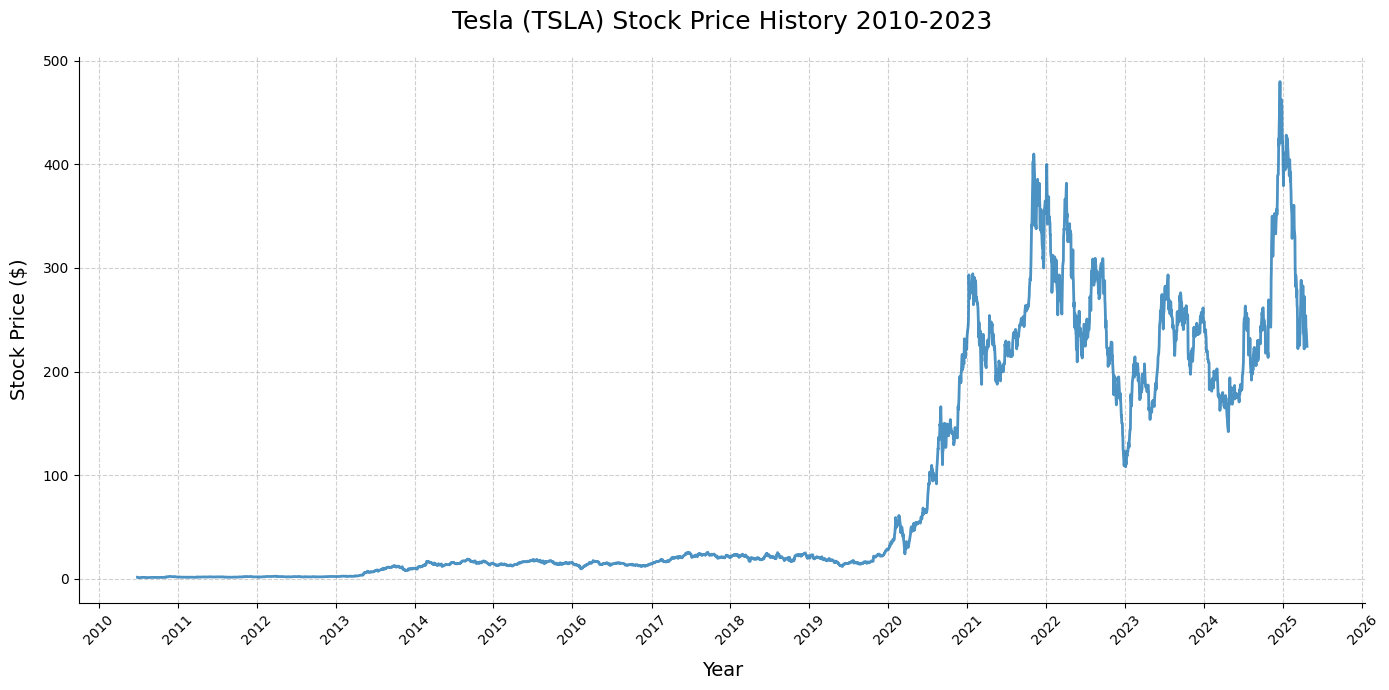

In [17]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def make_graph(stock_data, title):
    """
    Visualizes stock price history with professional formatting
    
    Parameters:
    stock_data (DataFrame): Must contain 'Date' and 'Close' columns
    title (str): Chart title
    """
    plt.figure(figsize=(14, 7))
    
    # Convert dates to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(stock_data['Date']):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    
    # Create plot with enhanced styling
    plt.plot(stock_data["Date"], 
             stock_data["Close"], 
             color='#1f77b4', 
             linewidth=2,
             alpha=0.8)
    
    # Formatting
    plt.title(title, fontsize=18, pad=20)
    plt.xlabel("Year", fontsize=14, labelpad=10)
    plt.ylabel("Stock Price ($)", fontsize=14, labelpad=10)
    
    # Grid and axis formatting
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Tight layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

# Generate Tesla stock price graph
print("\nTesla Stock Price Graph:")
make_graph(tesla_data, "Tesla (TSLA) Stock Price History 2010-2023")

In [ ]:
Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.


GameStop Stock Price Graph:


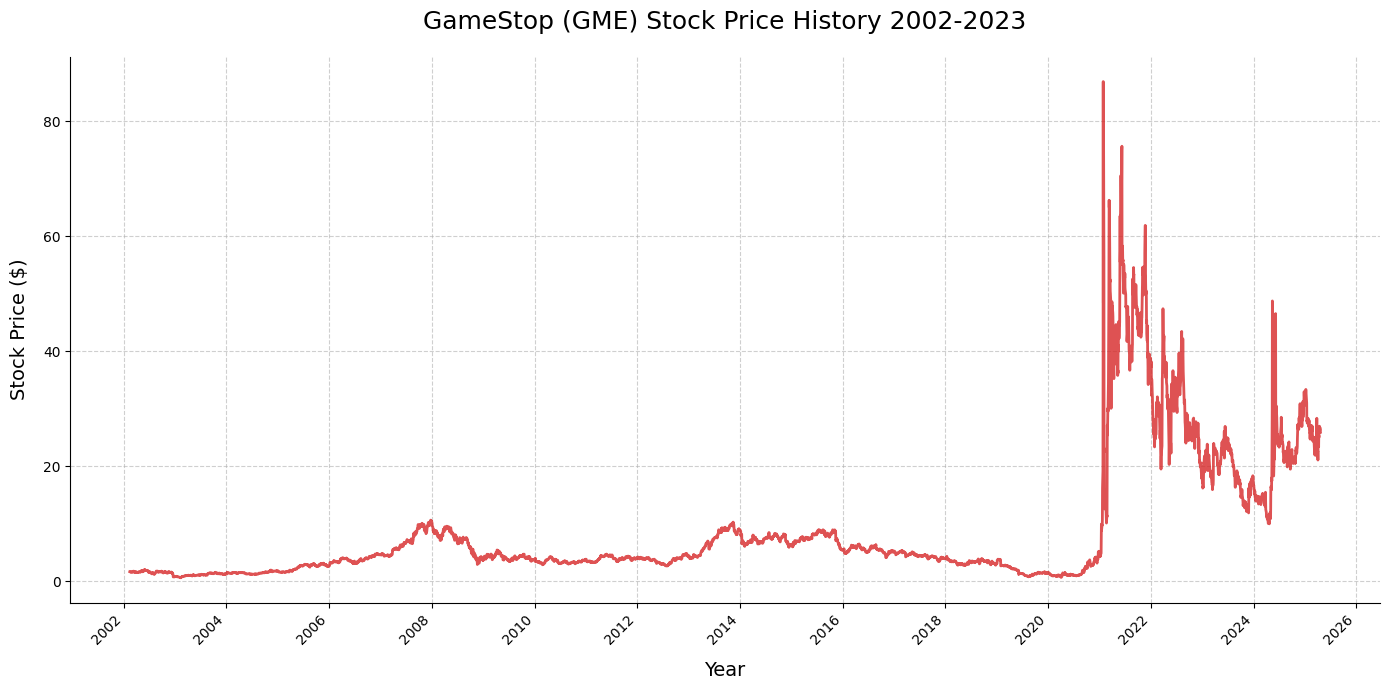


All data successfully saved to CSV files


In [18]:
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

def make_graph(stock_data, title):
    """
    Visualizes stock price history with professional formatting
    
    Parameters:
    stock_data (DataFrame): Must contain 'Date' and 'Close' columns
    title (str): Chart title
    """
    # Create figure with enhanced styling
    plt.figure(figsize=(14, 7))
    
    # Convert dates to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(stock_data['Date']):
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    
    # Plot data
    plt.plot(stock_data["Date"], 
             stock_data["Close"], 
             color='#d62728',  # Red color for GME
             linewidth=2,
             alpha=0.8)
    
    # Formatting
    plt.title(title, fontsize=18, pad=20)
    plt.xlabel("Year", fontsize=14, labelpad=10)
    plt.ylabel("Stock Price ($)", fontsize=14, labelpad=10)
    
    # Grid and axis formatting
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Rotate and align x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Tight layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

# Generate GameStop stock price graph
print("\nGameStop Stock Price Graph:")
make_graph(gme_data, "GameStop (GME) Stock Price History 2002-2023")

# Save all data to CSV (with error handling)
try:
    tesla_data.to_csv("tesla_stock_data.csv", index=False)
    gme_data.to_csv("gme_stock_data.csv", index=False)
    tesla_revenue.to_csv("tesla_revenue.csv", index=False)
    gme_revenue.to_csv("gme_revenue.csv", index=False)
    print("\nAll data successfully saved to CSV files")
except Exception as e:
    print(f"\nError saving files: {e}")